# KMeans: choosing clusters

## Recap from yesterday's session: get the data ready and run k-means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,Female
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,Male
183,Chinstrap,Dream,54.2,20.8,201.0,4300.0,Male
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,Female


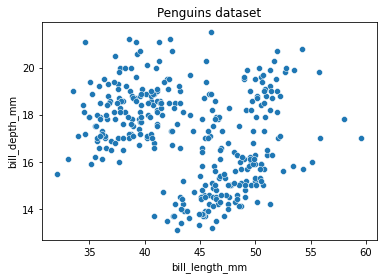

In [ ]:
penguins.dropna(inplace=True)
plt.title('Penguins dataset')
sns.scatterplot(data=penguins, x='bill_length_mm',	y='bill_depth_mm')
plt.show()

In [ ]:
columns = ['bill_length_mm', 'bill_depth_mm']

peng_sample = penguins.filter(columns)
peng_sample.head(3)

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
peng_norm = MinMaxScaler().fit_transform(peng_sample)
pd.DataFrame(peng_norm, columns=columns).head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


In [ ]:
from sklearn.cluster import KMeans
peng_kmeans = KMeans(n_clusters=3).fit(peng_norm)

peng_kmeans

KMeans(n_clusters=3)

### Visualise the relation between variables

In [ ]:
columns = ['bill_length_mm', 'bill_depth_mm']

centroids = pd.DataFrame(peng_kmeans.cluster_centers_)
centroids.columns = columns
centroids

,bill_length_mm,bill_depth_mm
0,0.549303,0.224802
1,0.243784,0.613578
2,0.646378,0.667033


In [ ]:
plot_data = pd.DataFrame(peng_norm)
plot_data.columns = columns
plot_data['cluster'] = peng_kmeans.labels_#peng_kmeans.predict(peng_norm)
plot_data.head()

,bill_length_mm,bill_depth_mm,cluster
0,0.254545,0.666667,1
1,0.269091,0.511905,1
2,0.298182,0.583333,1
3,0.167273,0.738095,1
4,0.261818,0.892857,1


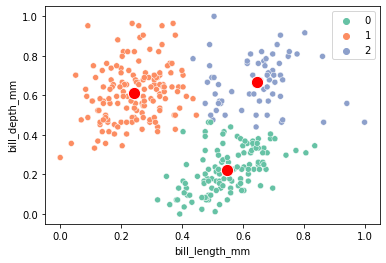

In [ ]:
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='bill_length_mm', y='bill_depth_mm', color='red', s=150)
plt.show()

## Ways to find the right number of clusters

If you read the concepts on the LMS and they are still a bit blury, you can watch this [short video](https://www.youtube.com/watch?v=AtxQ0rvdQIA). If the 2 concepts still do not make sense after doing all this, send me a DM and we can go over the concepts together. 

### Using inertia

In [ ]:
peng_kmeans.inertia_

8.769486294749548

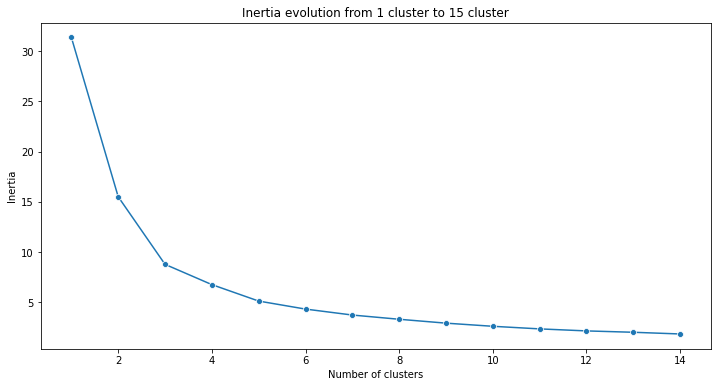

In [ ]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(peng_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Food ratings example

In [ ]:
sheet_id = '13n9SfqHIyzPHXzdPK0zqRE3gGfwkwe2vb9_ZjYYRpr8'
sheet_name = 'DS005'
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

food = (
  pd.read_csv(url, index_col='student')
    .drop(['age','favorite_color'], axis=1)
    )
food

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Hesham,0,0,9,7,5,7,8,9,4
Ajla,6,0,6,10,10,9,4,9,0
Andrea,9,8,7,1,2,0,10,2,0
Carolina,9,7,10,0,10,8,10,1,6
Daniil,3,5,10,10,7,6,6,10,5
Enrico,9,6,1,0,2,5,8,9,0
Martin,4,7,10,0,1,10,0,0,2
Monika,9,7,8,0,6,10,0,8,2
Neda,3,5,10,1,7,2,8,0,0


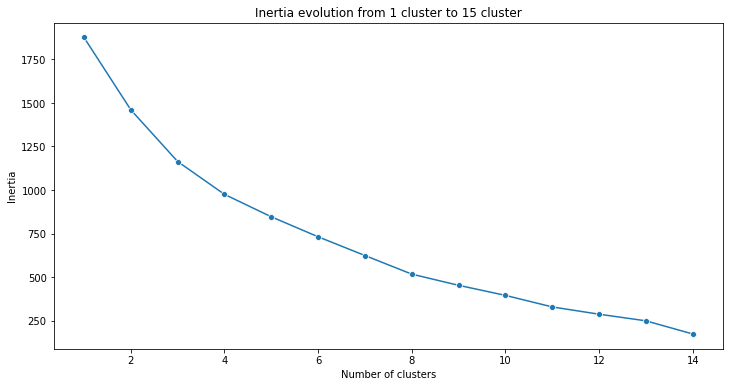

In [ ]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(food).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(peng_norm, peng_kmeans.labels_)

0.5139272799995429

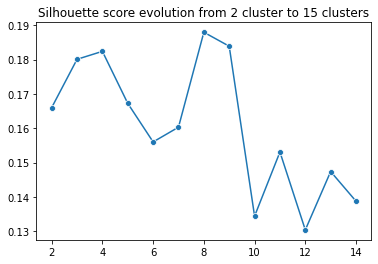

In [ ]:
max_k = 15
sil_score = []

food_norm = MinMaxScaler().fit_transform(food)

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(food_norm).labels_
    sil_score.append(silhouette_score(food_norm, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

* For k = 2 the average to silhouette is: 0.166
	- For cluster = 0 the silhouette value is: 0.24
	- For cluster = 1 the silhouette value is: 0.12


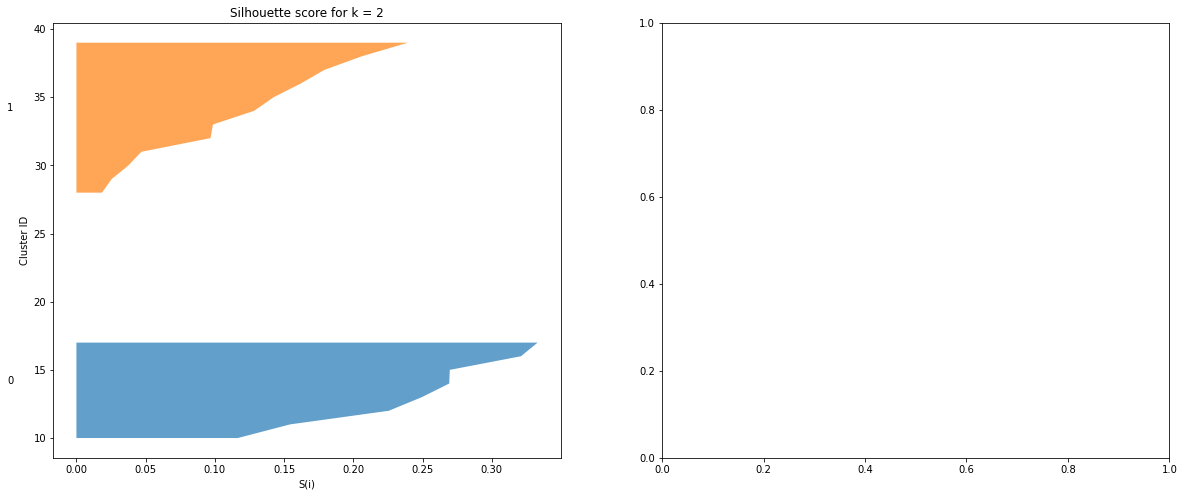

* For k = 3 the average to silhouette is: 0.1784
	- For cluster = 0 the silhouette value is: 0.15
	- For cluster = 1 the silhouette value is: 0.2
	- For cluster = 2 the silhouette value is: 0.19


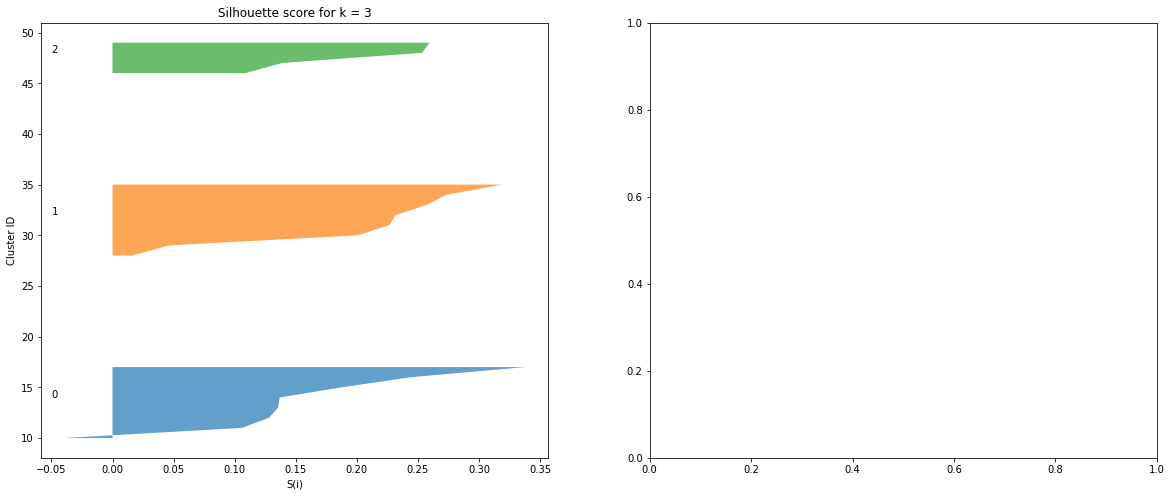

* For k = 4 the average to silhouette is: 0.1575
	- For cluster = 0 the silhouette value is: 0.06
	- For cluster = 1 the silhouette value is: 0.29
	- For cluster = 2 the silhouette value is: 0.22
	- For cluster = 3 the silhouette value is: 0.1


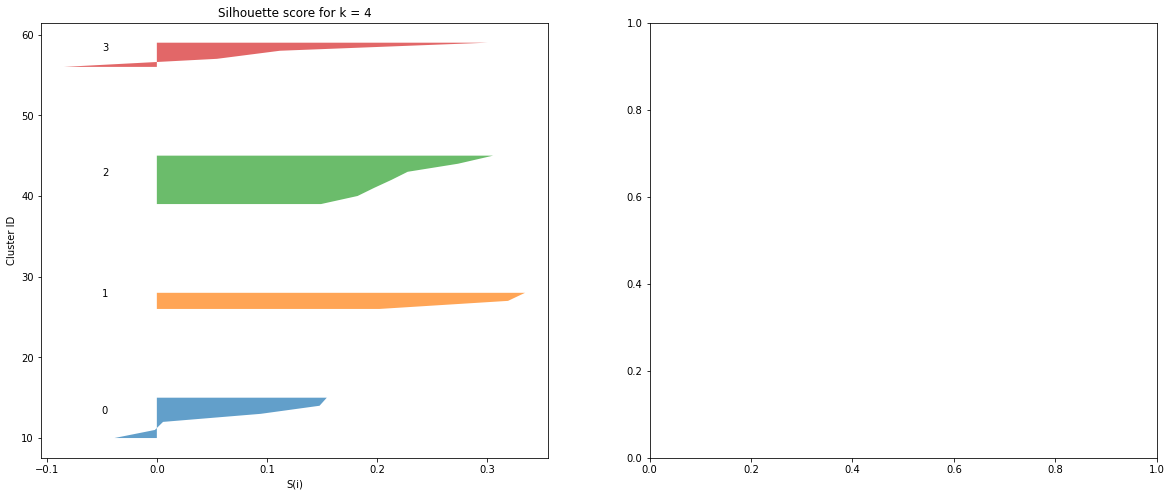

* For k = 5 the average to silhouette is: 0.183
	- For cluster = 0 the silhouette value is: 0.13
	- For cluster = 1 the silhouette value is: 0.2
	- For cluster = 2 the silhouette value is: 0.24
	- For cluster = 3 the silhouette value is: 0.12
	- For cluster = 4 the silhouette value is: 0.31


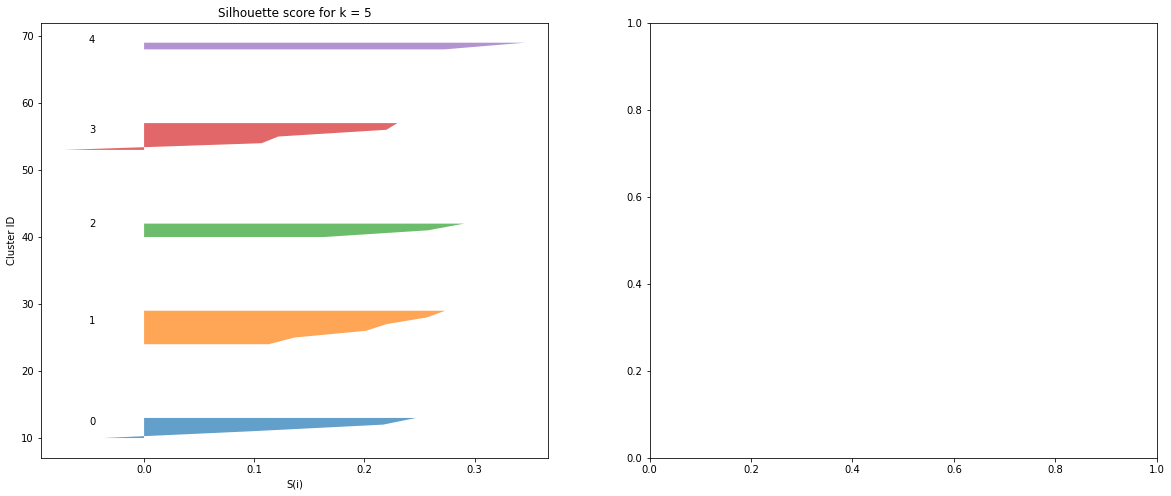

* For k = 6 the average to silhouette is: 0.1736
	- For cluster = 0 the silhouette value is: 0.17
	- For cluster = 1 the silhouette value is: 0.0
	- For cluster = 2 the silhouette value is: 0.19
	- For cluster = 3 the silhouette value is: 0.22
	- For cluster = 4 the silhouette value is: 0.29
	- For cluster = 5 the silhouette value is: 0.23


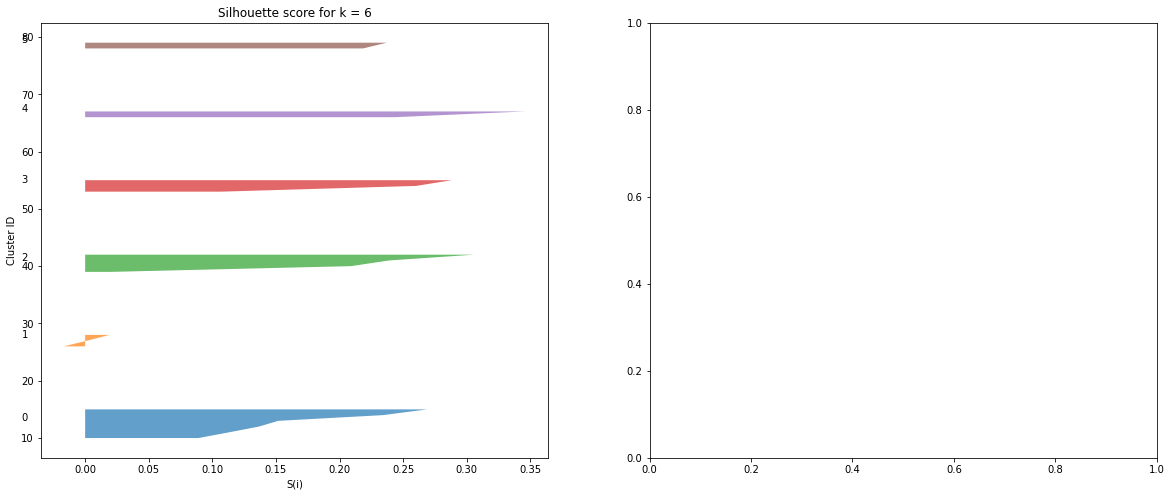

* For k = 7 the average to silhouette is: 0.1793
	- For cluster = 0 the silhouette value is: 0.11
	- For cluster = 1 the silhouette value is: 0.22
	- For cluster = 2 the silhouette value is: 0.19
	- For cluster = 3 the silhouette value is: 0.27
	- For cluster = 4 the silhouette value is: 0.23
	- For cluster = 5 the silhouette value is: 0.17
	- For cluster = 6 the silhouette value is: 0.09


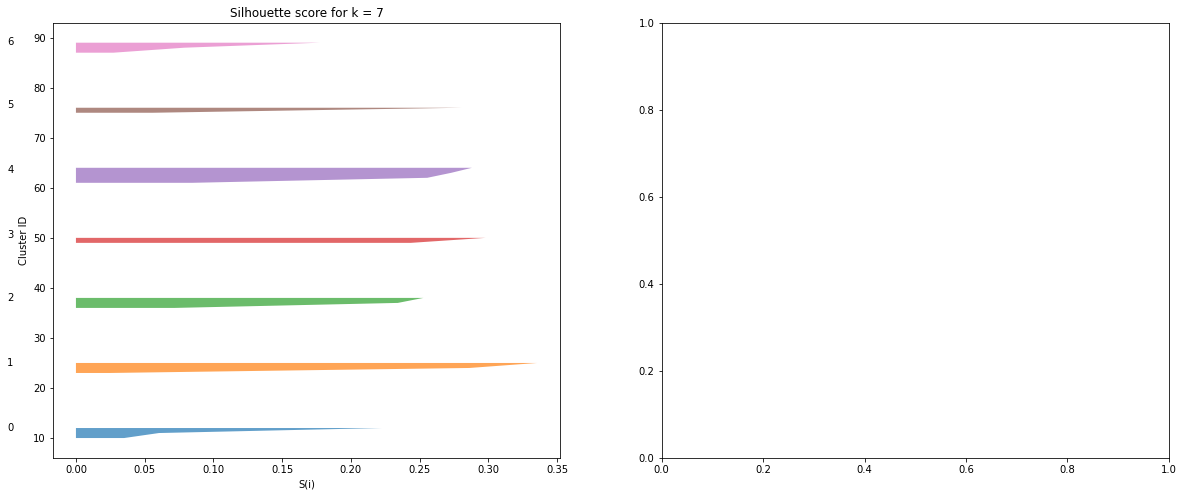

In [ ]:
#@title Plots
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = food_norm

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    # if 1 < k: 
    #     centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
    #     centr_df_temp.columns = columns
    #     centr_df_temp['cluster_name'] = centr_df_temp.index

    #     plot_data = pd.DataFrame(data)
    #     plot_data.columns = columns
    #     plot_data['cluster'] = kmean_model.predict(data)

    #     plt.title('Penguins clusters with centroids using Kmeans')
    #     sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
    #     sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
    #     for i in range(centr_df_temp.shape[0]):
    #         plt.text(
    #             x=centr_df_temp.bill_length_mm[i], 
    #             y=centr_df_temp.bill_depth_mm[i],
    #             s=centr_df_temp.cluster_name[i], 
    #             size=20
    #         )
        plt.show()